In [1]:
import numpy as np
from numpy import exp, log, zeros, eye, ceil
from numpy.linalg import norm
from numpy.random import uniform, randn, choice
from scipy.stats import norm as ndist
from warnings import catch_warnings, filterwarnings
from scipy.optimize import fsolve

from smc_thug_fixed_stepsize_rwm_then_thug import SMCTHUG

In [2]:
from bip_functions import F, FL, logpriorL, log_epanechnikov_kernelL
from bip_functions import log_posteriorL, grad_FL, FL_broadcast, sample_priorL

from numpy import errstate, log, ones, zeros
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [3]:
N = 5000
B = 5
σ = 1e-8
y_bip = 1
d_bip = 3

In [4]:
ϵmin = 1e-10
pmin = 0.3
pter = 0.01
δ0   = 0.5
maxiter=200
maxMCMC=10
αmax=0.9999

In [5]:
##### RWM then THUG (adaptive)
smc_bip_thug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    force_hug=False,
    αmax=αmax,
    pter_multiplier=1.1
)

smc_bip_thug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_thug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_thug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_thug.sample_prior = sample_priorL
smc_bip_thug.get_γ = lambda i: 1.0 #i**(-1/20)  

out_bip_thug = smc_bip_thug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: isotropic RWM.
### THUG kernel (for later): THUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.
0 200 546.5346894142311 1e-10
True
True True

### SMC step:  1
ϵ = 13.2226300000	 N unique starting: 3161
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2021
Stepsize used in next SMC iteration: 0.5000

### SMC step:  2
ϵ = 3.5150000000	 N unique starting: 2943
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1664
Stepsize used in next SMC iteration: 0.5000

### SMC step:  3
ϵ = 1.6681400000	 N unique starting: 2875
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1439
Stepsize used in next SMC iteration: 0.5000

### SMC step:  4
ϵ = 1.3319300000	 N unique starting: 2780
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1168
Stepsize used in next SMC iteration: 0.5000

### SMC step

Average Acceptance Probability: 0.0316
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.7084

### SMC step:  42
ϵ = 0.0019600000	 N unique starting: 1690
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0298
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.7609

### SMC step:  43
ϵ = 0.0016900000	 N unique starting: 1643
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0292
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.8067

### SMC step:  44
ϵ = 0.0014100000	 N unique starting: 1610
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0310
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.8452

### SMC step:  45
ϵ = 0.0011800000	 N unique starting: 1598
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0277
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.8776

### SMC step:  

Average Acceptance Probability: 0.0094
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.9999


In [6]:
##### RWM then THUG (fixed α)
smc_bip_hug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    force_hug=True,
    αmax=αmax
)

smc_bip_hug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_hug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_hug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_hug.sample_prior = sample_priorL 

out_bip_hug = smc_bip_hug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: isotropic RWM.
### THUG kernel (for later): HUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.
0 200 1324.9635655210793 1e-10
True
True True

### SMC step:  1
ϵ = 15.4270900000	 N unique starting: 3125
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2055
Stepsize used in next SMC iteration: 0.5000

### SMC step:  2
ϵ = 3.9077500000	 N unique starting: 2928
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1760
Stepsize used in next SMC iteration: 0.5000

### SMC step:  3
ϵ = 1.6805500000	 N unique starting: 2890
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1494
Stepsize used in next SMC iteration: 0.5000

### SMC step:  4
ϵ = 1.3242300000	 N unique starting: 2782
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1202
Stepsize used in next SMC iteration: 0.5000

### SMC step

Average Acceptance Probability: 0.0171
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  42
ϵ = 0.0021700000	 N unique starting: 1290
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0158
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  43
ϵ = 0.0018800000	 N unique starting: 1229
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0137
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  44
ϵ = 0.0016200000	 N unique starting: 1174
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0128
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  45
ϵ = 0.0014000000	 N unique starting: 1102
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0119
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  

In [7]:
padded_alphas = np.pad(out_bip_thug['ALPHAS'], (len(out_bip_thug['EPSILON']) - len(out_bip_thug['ALPHAS']), 0), 'constant', constant_values=np.nan)

In [40]:
padit = lambda out, lb: np.pad(np.array(out[lb], dtype=np.float64)[:out['SWITCH_TO_THUG']], (0, len(out[lb]) - len(out[lb][:out['SWITCH_TO_THUG']])), 'constant', constant_values=np.nan)

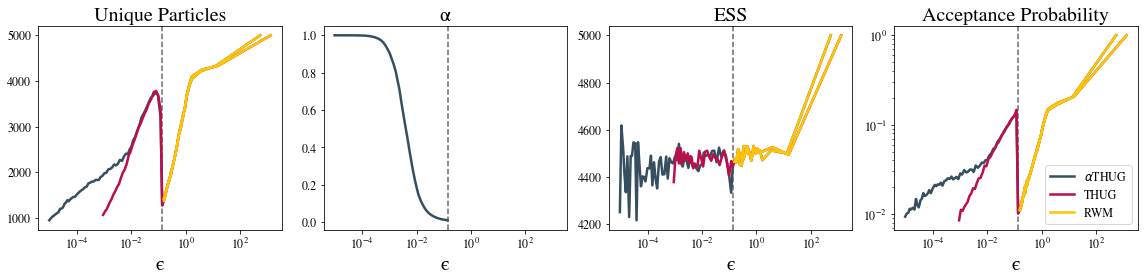

In [51]:
from matplotlib import rc
rc('font',**{'family':'STIXGeneral'})
COLOR_THUG = '#354F60'
COLOR_HUG  = '#BC0E4C'
COLOR_RWM  = '#FFC501'

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)
lw = 2.5
TICK_LABEL_SIZE=12
TITLE_SIZE = 20

# Unique Particles
ax[0].plot(out_bip_thug['EPSILON'], out_bip_thug['UNIQUE_PARTICLES'], label=r'THUG-$\alpha$', lw=lw, color=COLOR_THUG)
ax[0].plot(out_bip_hug['EPSILON'], out_bip_hug['UNIQUE_PARTICLES'], label='THUG', lw=lw, color=COLOR_HUG)
# Before switching
ax[0].plot(padit(out_bip_thug, 'EPSILON'), padit(out_bip_thug, 'UNIQUE_PARTICLES'), label=r'RWM', lw=lw, color=COLOR_RWM)
ax[0].plot(padit(out_bip_hug, 'EPSILON'), padit(out_bip_hug, 'UNIQUE_PARTICLES'), lw=lw, color=COLOR_RWM)
ax[0].set_xlabel("ϵ", fontsize=20)
#ax[0].set_ylabel("Unique Particles")
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
ax[0].set_title("Unique Particles", fontsize=TITLE_SIZE)

# Step Sizes
ax[1].plot(out_bip_thug['EPSILON'], padded_alphas, label=r'THUG-$\alpha$', lw=lw, color=COLOR_THUG)
ax[1].set_xlabel("ϵ", fontsize=20)
#ax[1].set_ylabel("Step Sizes")
ax[1].set_xscale('log')
# ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[1].set_title(r"$\mathregular{\alpha}$", fontsize=TITLE_SIZE)

# ESS
ax[2].plot(out_bip_thug['EPSILON'], out_bip_thug['ESS'], label=r'THUG-$\alpha$', lw=lw, color=COLOR_THUG)
ax[2].plot(out_bip_hug['EPSILON'], out_bip_hug['ESS'], label='THUG', lw=lw, color=COLOR_HUG)
# swtich
ax[2].plot(padit(out_bip_thug, 'EPSILON'), padit(out_bip_thug, 'ESS'), label=r'RWM', lw=lw, color=COLOR_RWM)
ax[2].plot(padit(out_bip_hug, 'EPSILON'), padit(out_bip_hug, 'ESS'), lw=lw, color=COLOR_RWM)
ax[2].set_xlabel("ϵ", fontsize=20)
#ax[2].set_ylabel("ESS")
ax[2].set_xscale('log')
# ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[2].set_title("ESS", fontsize=TITLE_SIZE)

# Acceptance Probability
ax[3].plot(out_bip_thug['EPSILON'], out_bip_thug['AP'], label=r'$\alpha$THUG', lw=lw, color=COLOR_THUG)
ax[3].plot(out_bip_hug['EPSILON'], out_bip_hug['AP'], label='THUG', lw=lw, color=COLOR_HUG)
# SWITCH
ax[3].plot(padit(out_bip_thug, 'EPSILON'), padit(out_bip_thug, 'AP'), label=r'RWM', lw=lw, color=COLOR_RWM)
ax[3].plot(padit(out_bip_hug, 'EPSILON'), padit(out_bip_hug, 'AP'), lw=lw, color=COLOR_RWM)
ax[3].set_xlabel("ϵ", fontsize=20)
#ax[3].set_ylabel("Acceptance probability")
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[3].set_title("Acceptance Probability", fontsize=TITLE_SIZE)

for i in range(4):
    ax[i].axvline(out_bip_thug['EPSILON'][out_bip_thug['SWITCH_TO_THUG']], color='dimgrey', ls='--', zorder=0)


plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
# plt.savefig("figures/smc_thug_rwm_then_thug.png", dpi=300)
plt.show()